# Introduction to Data Science and Machine Learning

<p align="center">
    <img width="699" alt="image" src="https://user-images.githubusercontent.com/49638680/159042792-8510fbd1-c4ac-4a48-8320-bc6c1a49cdae.png">
</p>

---

## Exercises

### Exercise - Classification

In this exercise, you will build a classification model to predict whether a student gets admitted into a university. Use the dataset in `datasets/students.txt`.

Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression or decision tree. For each training example, you have the applicant’s scores on two exams and the admissions decision.

Your task is to build a classification model that estimates an applicant’s probability of admission based the scores from those two exams.

1. Perform an exploratory data analysis and if necessary takes decision about feature scaling and encoding.
2. Build the model using both logistic regression and decision tree and compare results on the test set.
3. Plot confusion matrices of your models. Which one performs better on true positives? and which one on true negatives?
4. Plot the dataset and decision boundaries for both the models, how do these boundaries change?

---

## Proposed Solution

Here the proposed solution.

First of all let's import libraries.

In [20]:
# Standard imports.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (   roc_curve,
                                roc_auc_score,
                                precision_recall_curve,
                                f1_score,
                                auc,
                                classification_report,
                                confusion_matrix)


plt.rcParams["figure.figsize"] = (25,15) # Change the default figure size
%matplotlib inline
%config InlineBackend.figure_format = "retina"

To start working, we load data into a dataframe.

In [2]:
df = pd.read_csv('datasets/students.txt', header=None)
df.columns = ['x1', 'x2', 'label']

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805 entries, 0 to 804
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      805 non-null    float64
 1   x2      805 non-null    float64
 2   label   805 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 19.0 KB


In [4]:
df.describe()

,x1,x2,label
count,805.000000,805.000000,805.000000
mean,61.915671,64.501242,0.484472
std,18.556445,17.799392,0.500070
min,30.058822,30.603263,0.000000
25%,46.131485,48.642842,0.000000
50%,61.505324,63.913054,0.000000
75%,76.987760,81.250948,1.000000
max,99.827858,98.869436,1.000000


Let's plot these data by label.

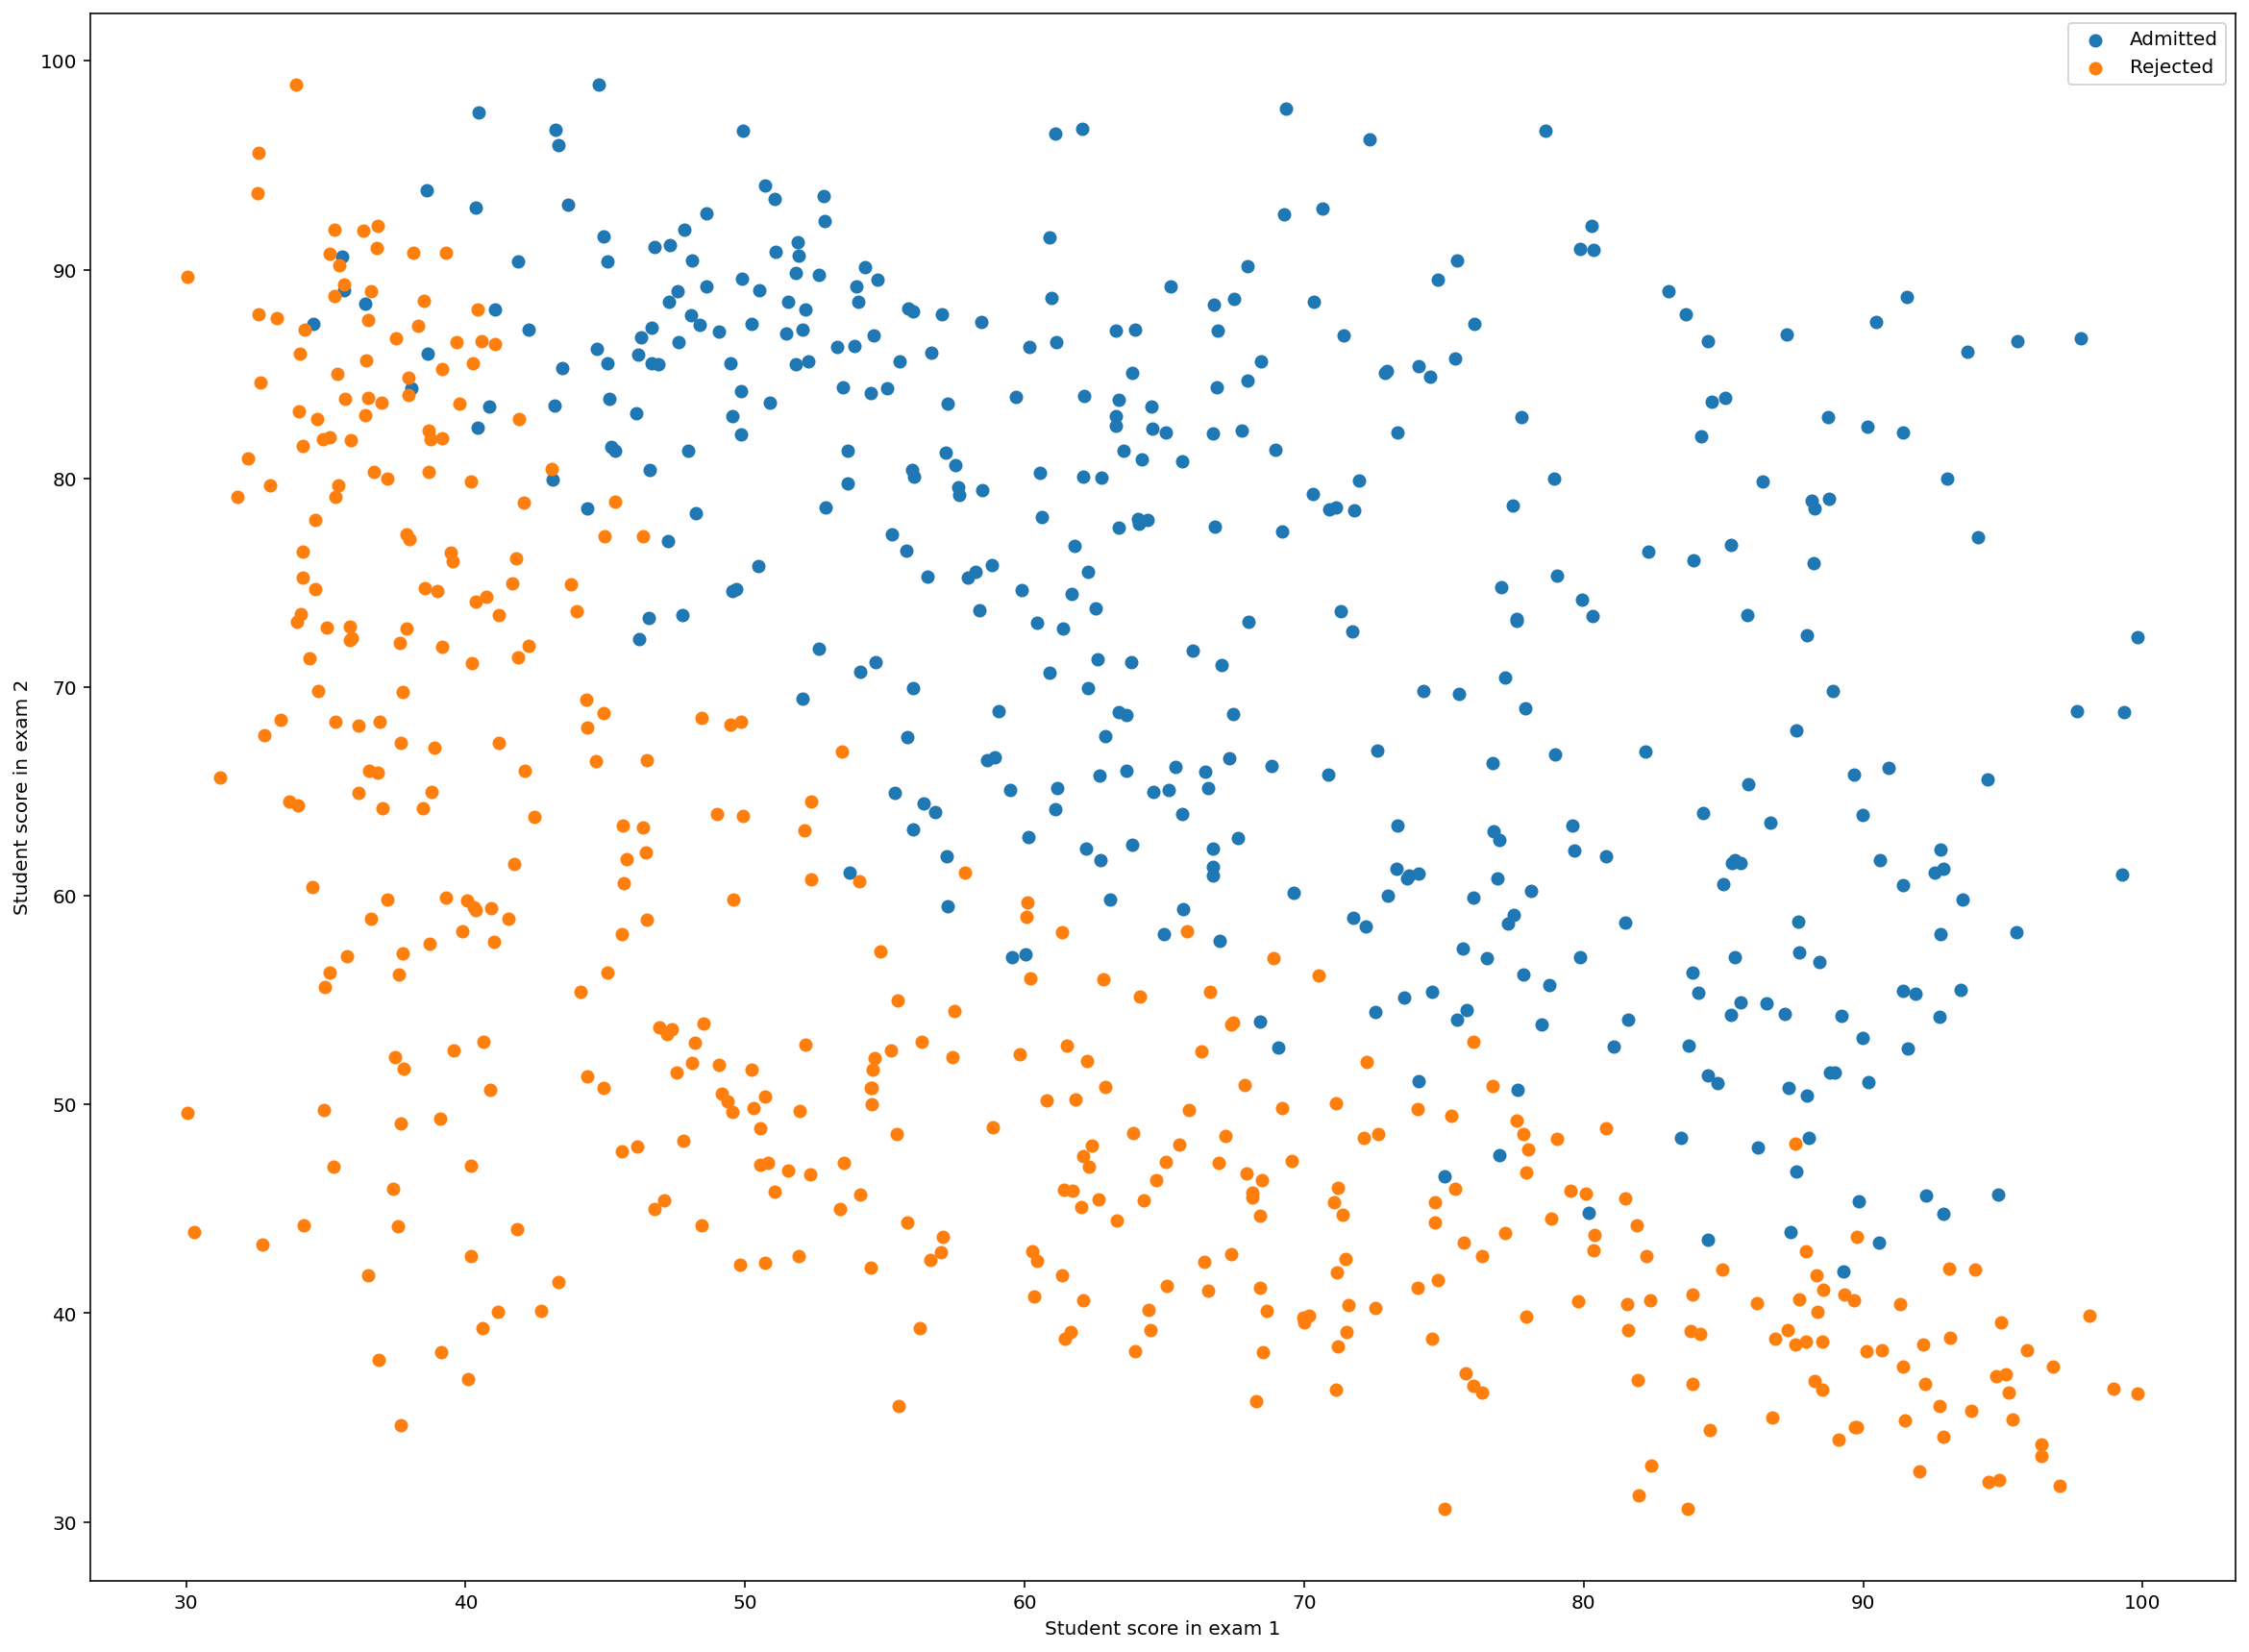

In [5]:
X = df.iloc[:,:-1]
y = df.iloc[:,2]

pos = (y == 1)
neg = (y == 0)

plt.figure(figsize=(20,15))
admitted = plt.scatter(X[pos]['x1'].values, X[pos]['x2'].values)
rejected = plt.scatter(X[neg]['x1'].values, X[neg]['x2'].values)
plt.xlabel('Student score in exam 1')
plt.ylabel('Student score in exam 2')
plt.legend((admitted, rejected), ('Admitted', 'Rejected'));

Scales are ok. We already can have an hint about the decision boundary (students having high scores in both exams are more likely admitted).

However, let's explore a bit better the data here.

First of all, we study the pairplot.

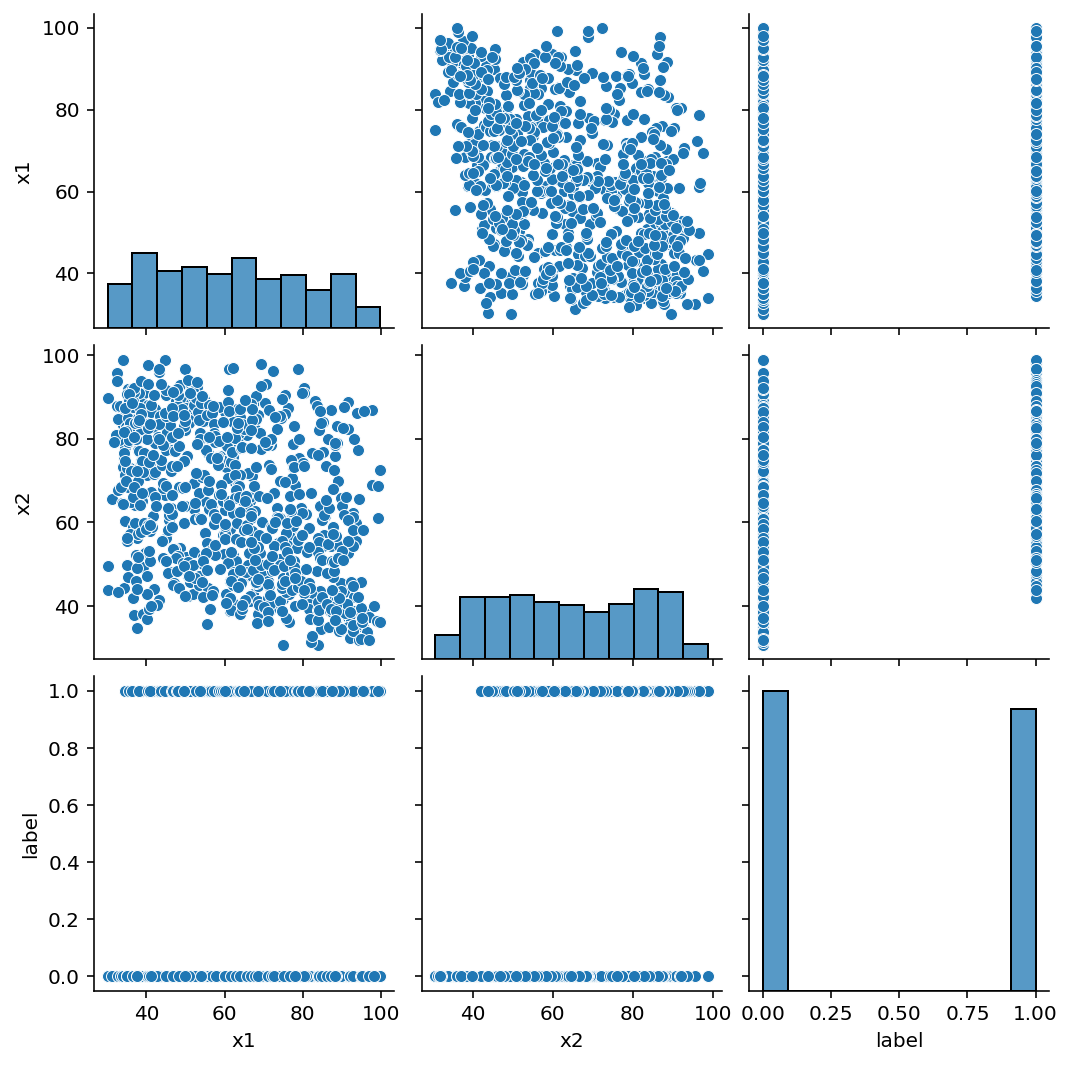

In [6]:
sns.pairplot(df);

As one can see, there is no clear correlation. However, let's see what happens if we compose the two features as a sum and plot that variable against the label.

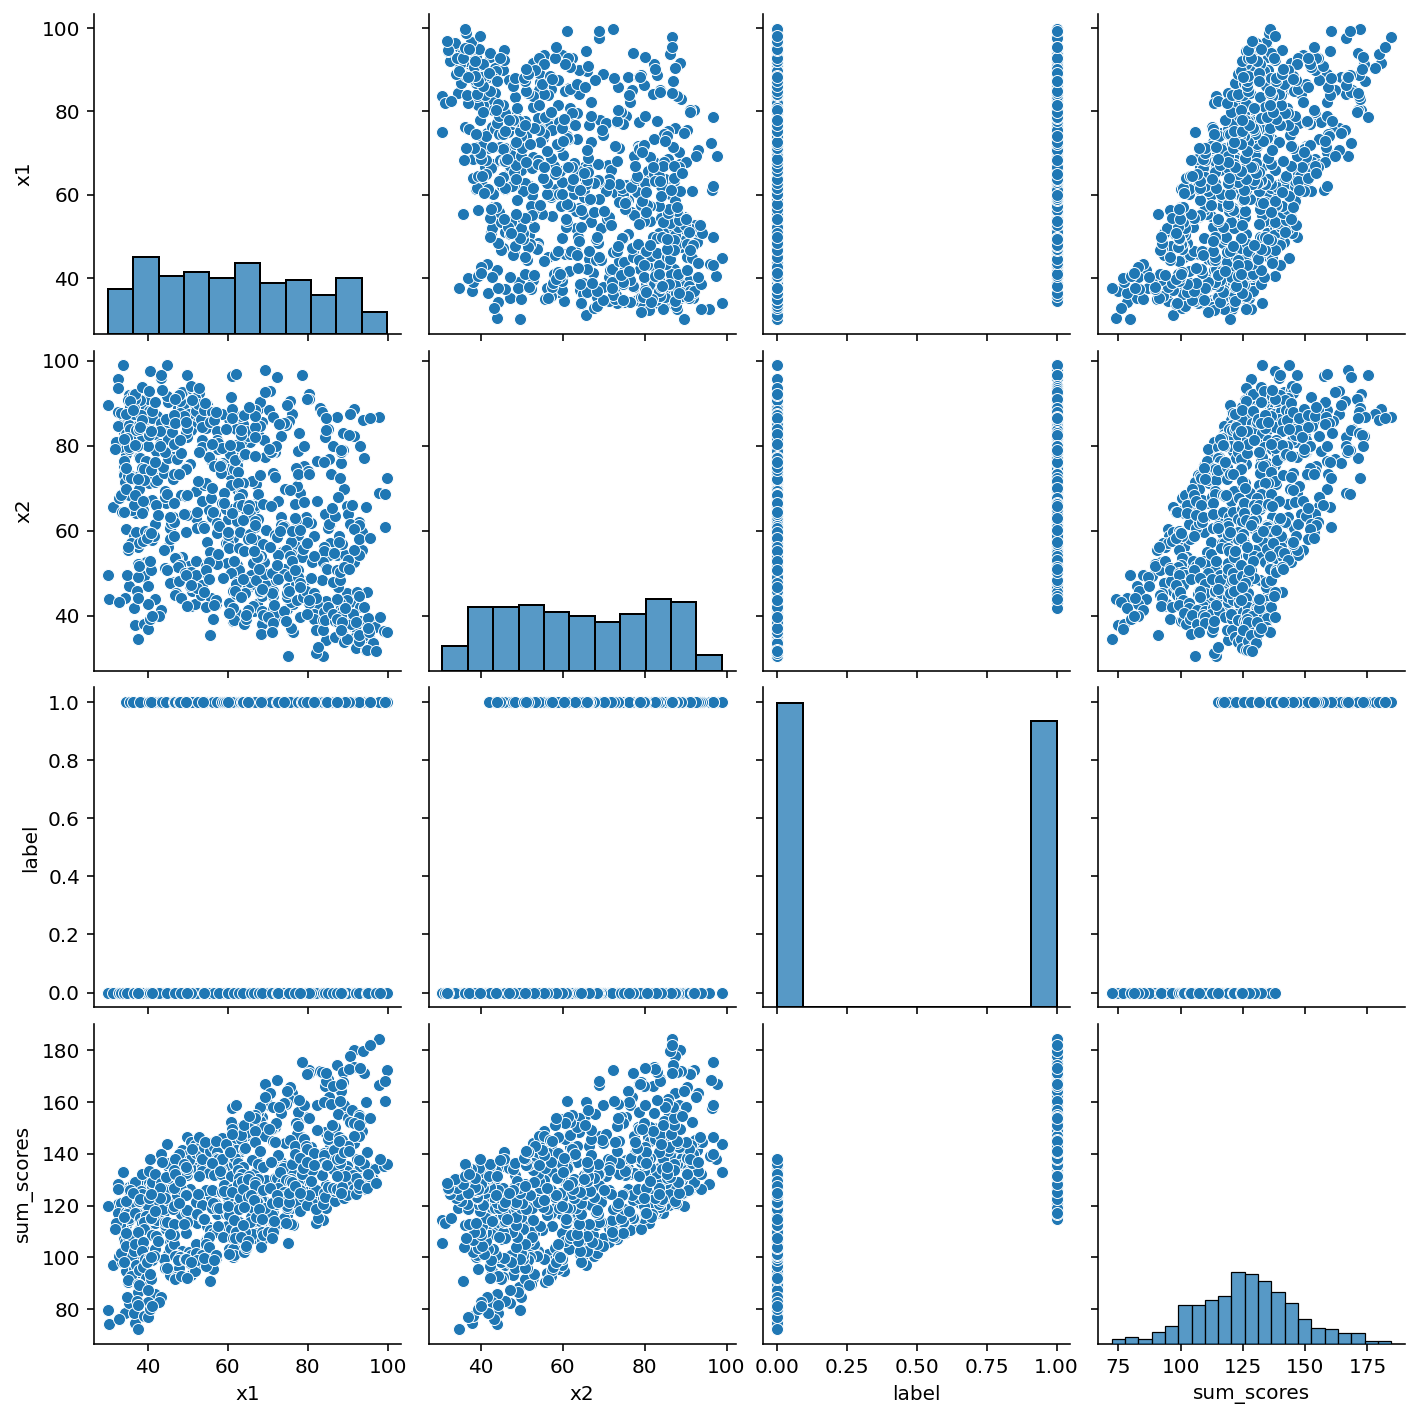

In [7]:
df_plot = df.copy()
df_plot['sum_scores'] = df_plot['x1'] + df_plot['x2']
sns.pairplot(df_plot);

A much clearer separation emerges: (lower scores are highly correlated with $0$ class).

Making use of weighted sum one can imagine to make such separation even clearer. 
This is precisely the role of our machine learning classifier.

#### Train test split

Let's spit our dataset into train and test in order to compare results of models afterwards.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(644, 2)
(161, 2)


#### Define models

Here we define the predicitve models we want to use.

In [9]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()

lr.fit(X_train, y_train)
dt.fit(X_train, y_train);

In [10]:
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89        98
           1       0.82      0.86      0.84        63

    accuracy                           0.87       161
   macro avg       0.86      0.87      0.86       161
weighted avg       0.87      0.87      0.87       161



In [11]:
print(classification_report(y_test, dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        98
           1       0.84      0.90      0.87        63

    accuracy                           0.89       161
   macro avg       0.89      0.90      0.89       161
weighted avg       0.90      0.89      0.90       161



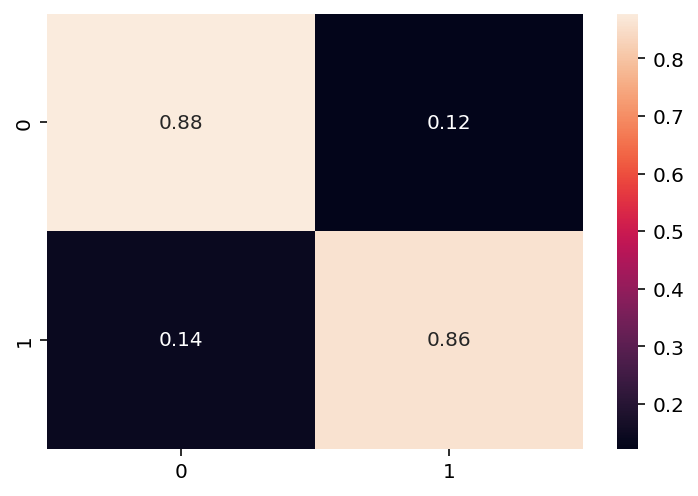

In [21]:
sns.heatmap(confusion_matrix(y_test, lr.predict(X_test), normalize='true'), annot=True);

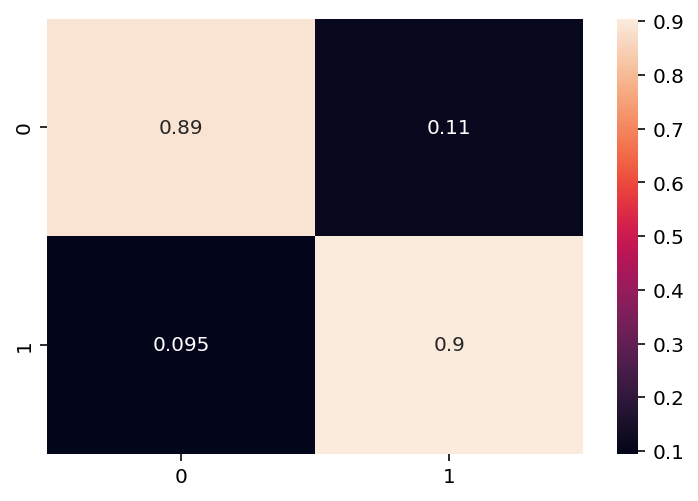

In [22]:
sns.heatmap(confusion_matrix(y_test, dt.predict(X_test), normalize='true'), annot=True);

/Users/oscardefelice/miniconda3/envs/lectures/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


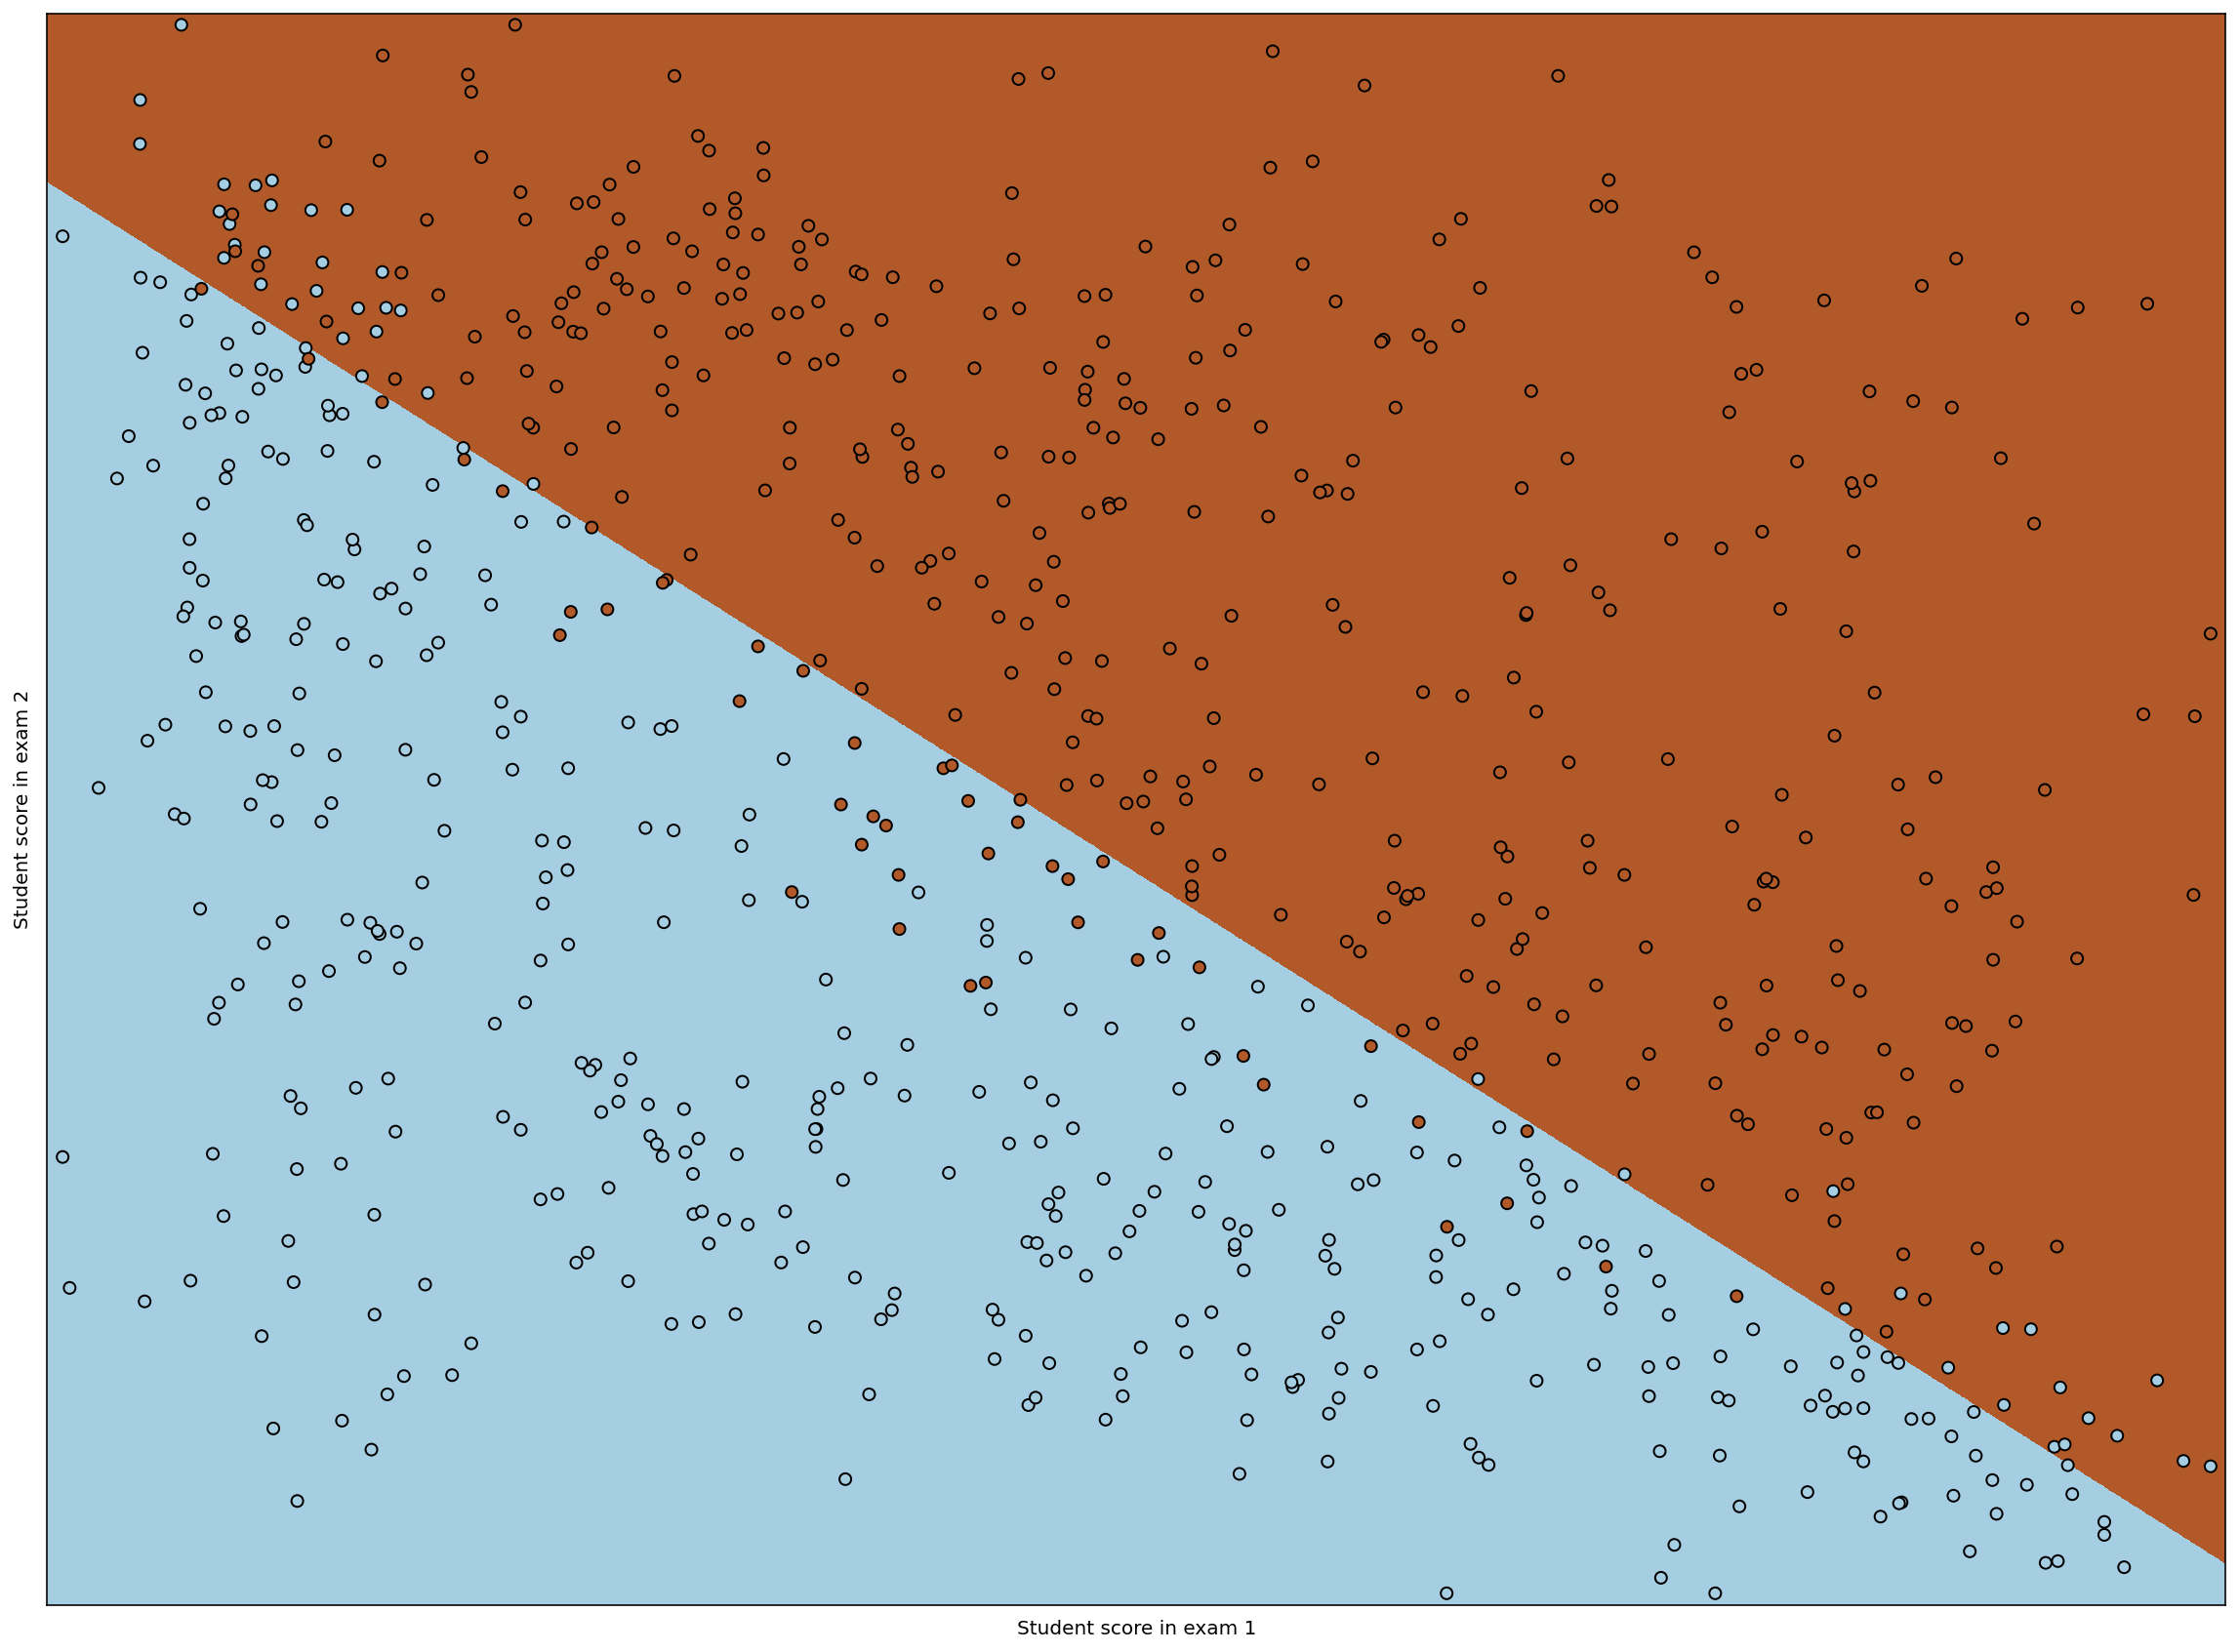

In [12]:
# Plot decision regions for Logistic Regression

### PLOTTING ###
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X["x1"].min() - .5, X["x1"].max() + .5
y_min, y_max = X["x2"].min() - .5, X["x2"].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.rcParams['pcolor.shading'] = 'auto'
plt.figure(1, figsize=(20, 15))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X["x1"], X["x2"], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Student score in exam 1')
plt.ylabel('Student score in exam 2')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show();

/Users/oscardefelice/miniconda3/envs/lectures/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


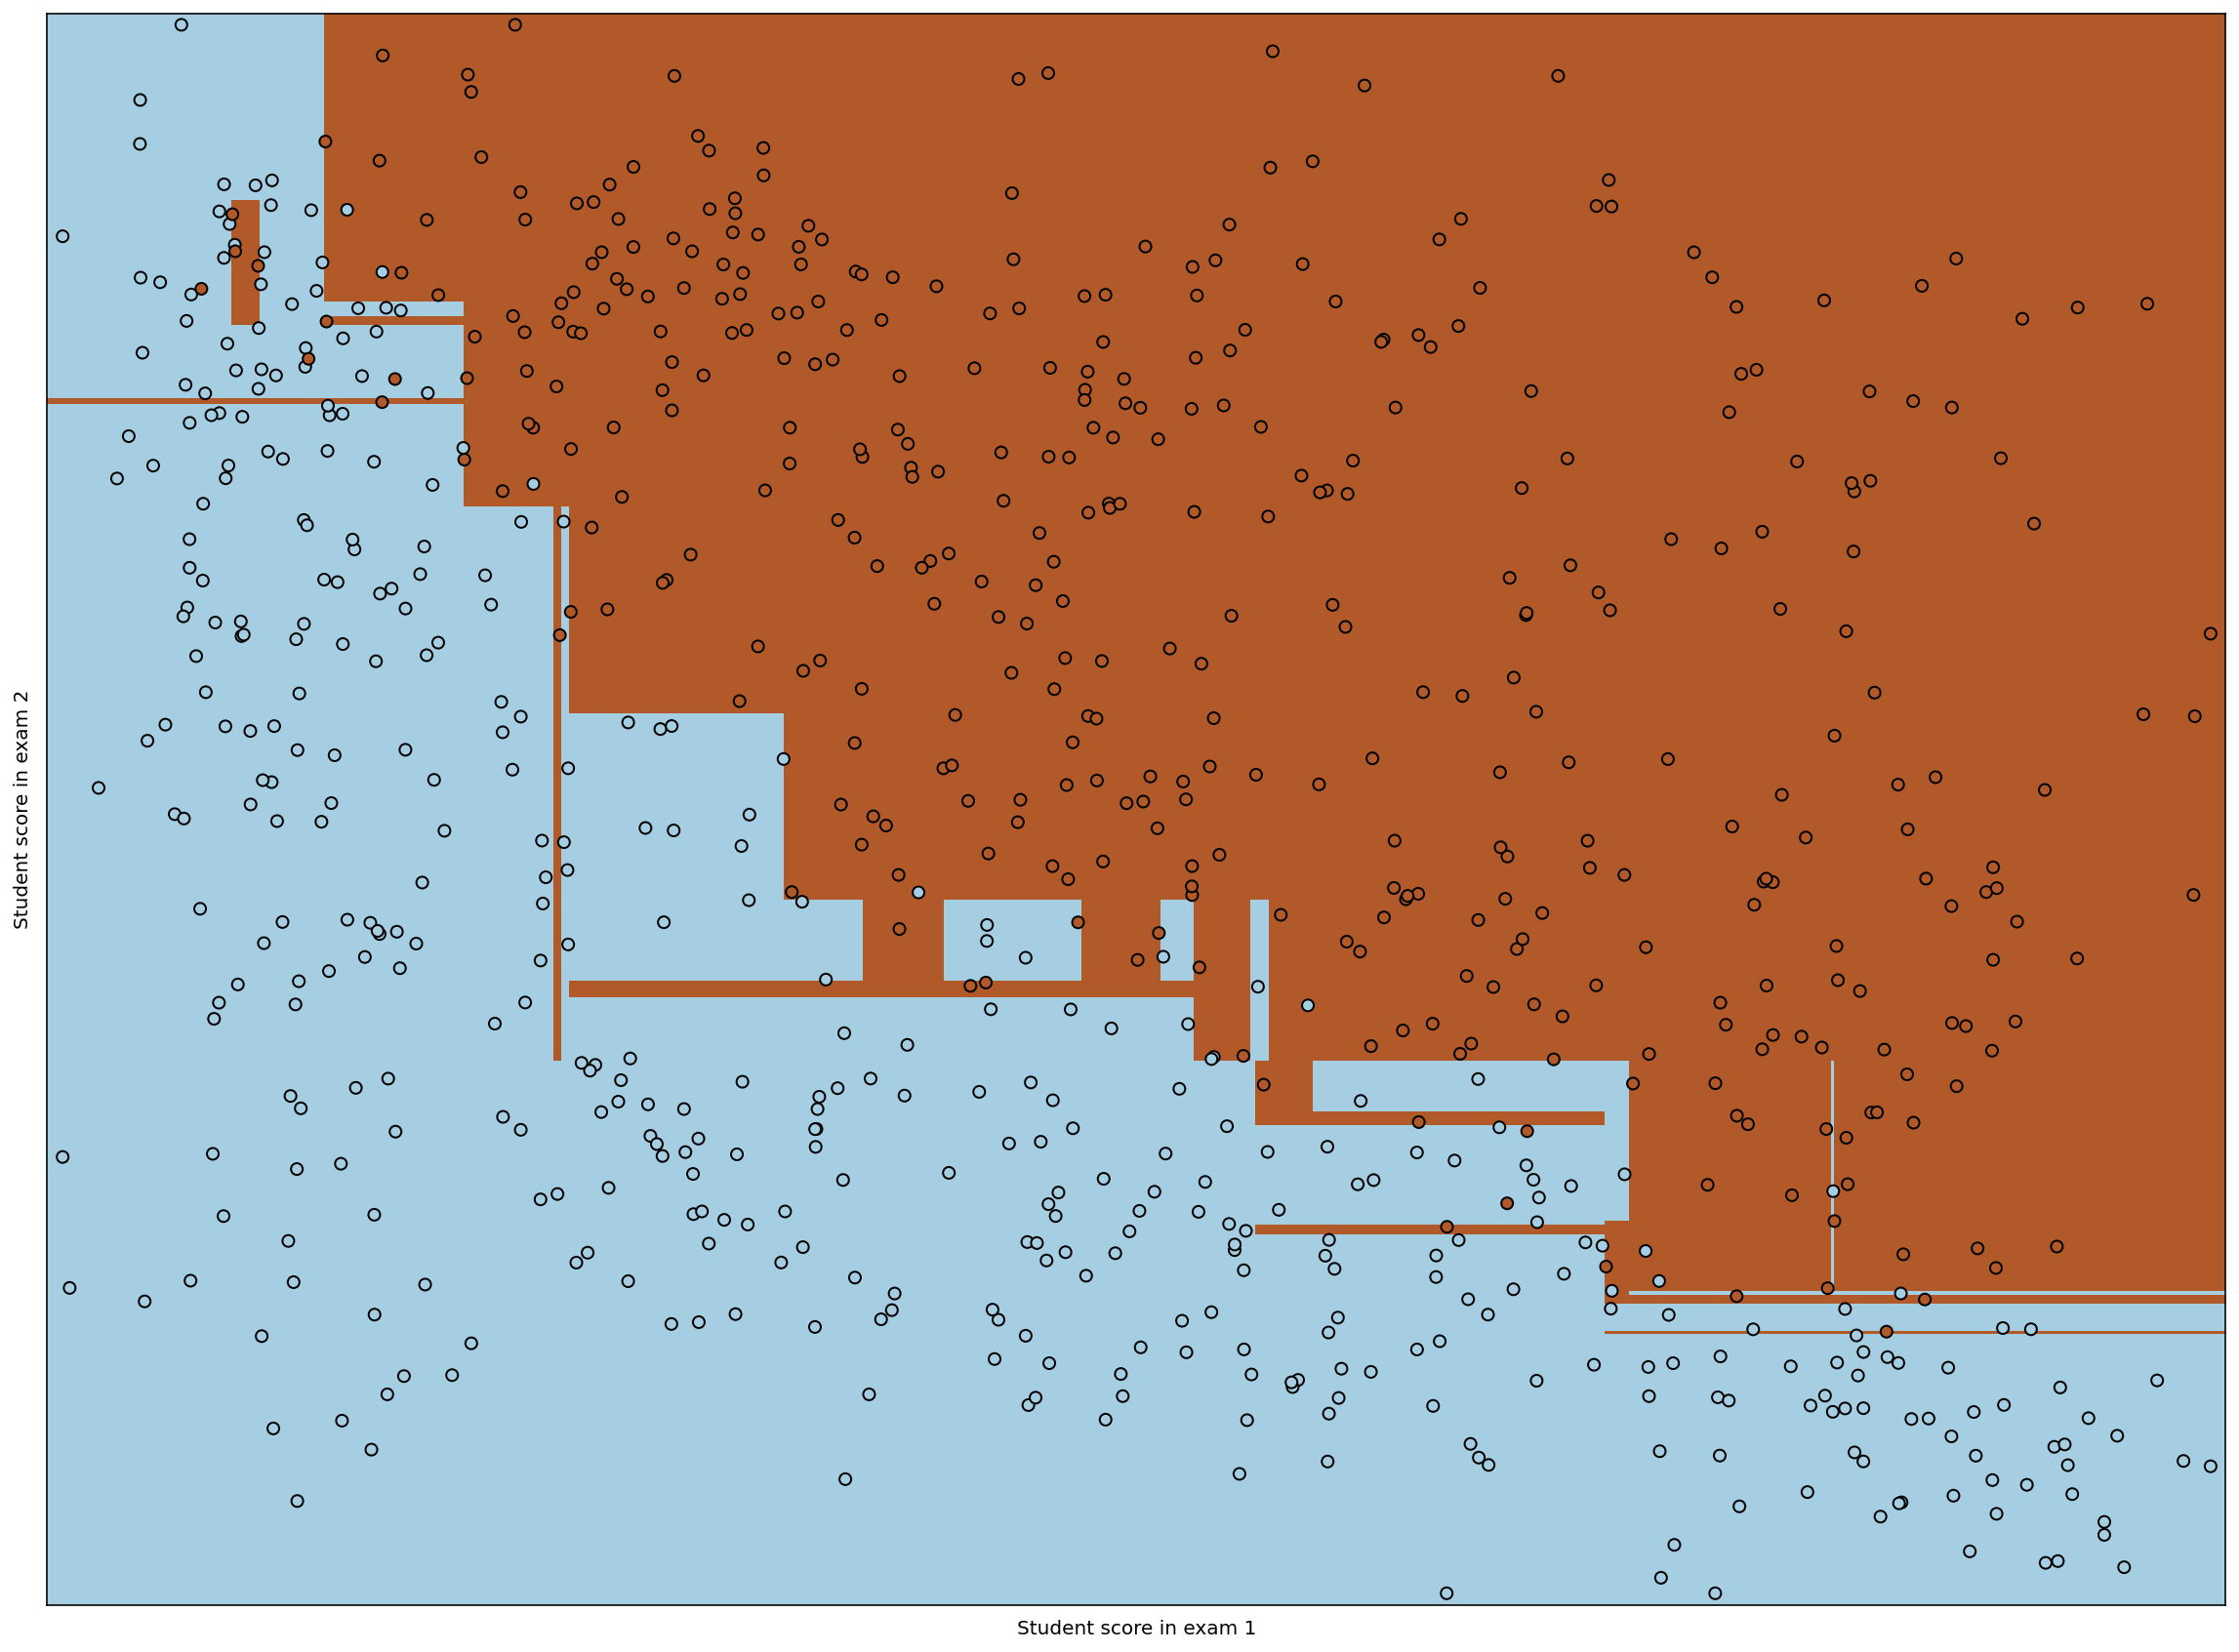

In [13]:
# Plot decision regions for Decision Tree

### PLOTTING ###
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X["x1"].min() - .5, X["x1"].max() + .5
y_min, y_max = X["x2"].min() - .5, X["x2"].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.rcParams['pcolor.shading'] = 'auto'
plt.figure(1, figsize=(20, 15))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X["x1"], X["x2"], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Student score in exam 1')
plt.ylabel('Student score in exam 2')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show();

### Bonus: Polynomial Logistic Regression

Here we want to produce a logistic regression with a polynomial decision boundary.

In [14]:
pol_feat = PolynomialFeatures(degree=2)
X_poly_train = pol_feat.fit_transform(X_train)
X_poly_test = pol_feat.transform(X_test)

In [15]:
lr_poly = LogisticRegression()
lr_poly.fit(X_poly_train, y_train)

LogisticRegression()

In [16]:
print(classification_report(y_test, lr_poly.predict(X_poly_test)))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        98
           1       0.91      0.94      0.92        63

    accuracy                           0.94       161
   macro avg       0.93      0.94      0.94       161
weighted avg       0.94      0.94      0.94       161



/Users/oscardefelice/miniconda3/envs/lectures/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


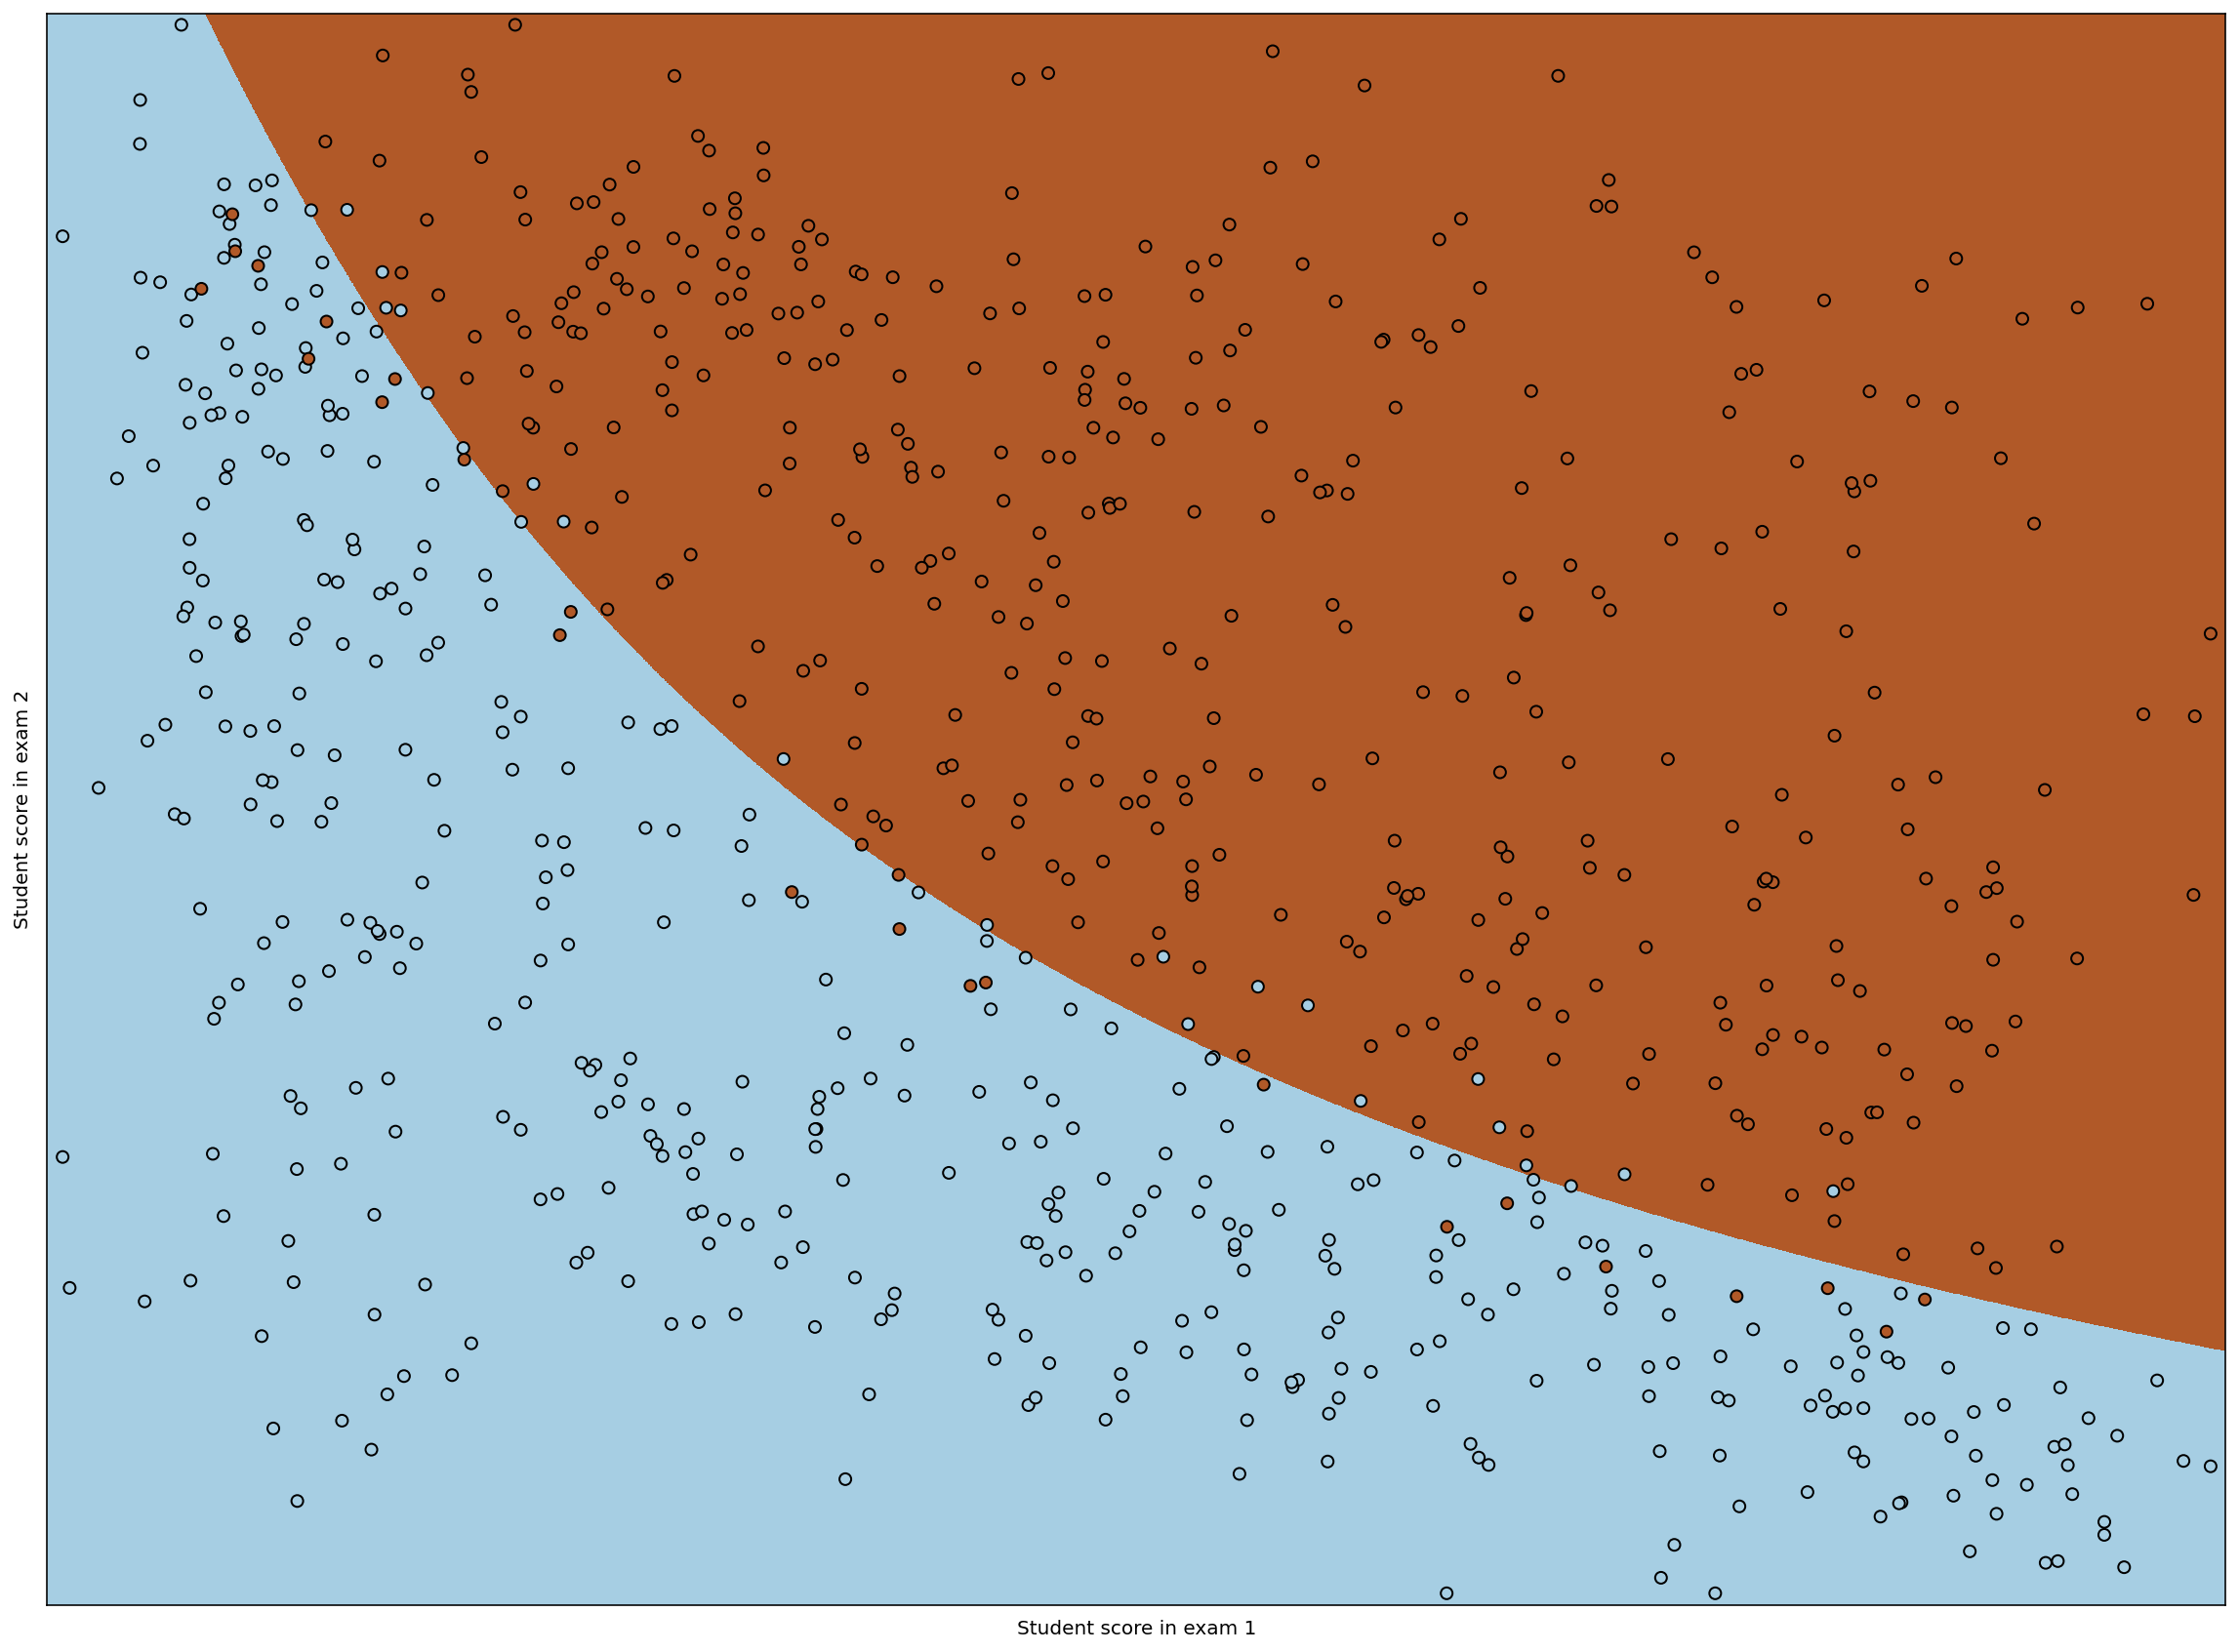

In [18]:
# Plot decision regions for Polynomial Logistic Regression

### PLOTTING ###
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X["x1"].min() - .5, X["x1"].max() + .5
y_min, y_max = X["x2"].min() - .5, X["x2"].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X_plot = pol_feat.transform(np.c_[xx.ravel(), yy.ravel()])
Z = lr_poly.predict(X_plot)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.rcParams['pcolor.shading'] = 'auto'
plt.figure(1, figsize=(20, 15))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X["x1"], X["x2"], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Student score in exam 1')
plt.ylabel('Student score in exam 2')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show();

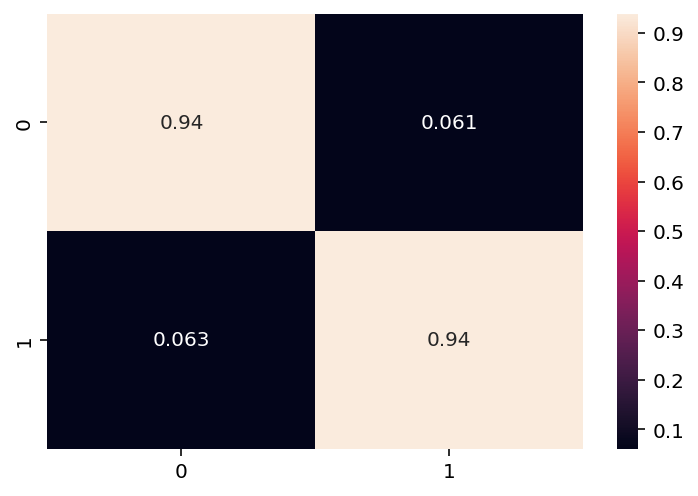

In [23]:
sns.heatmap(confusion_matrix(y_test, lr_poly.predict(X_poly_test), normalize='true'), annot=True);